<a href="https://colab.research.google.com/github/preeti1604/Bharat-Intern/blob/main/SMS_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🚫📧 Introduction of Spam:**

Spam refers to unsolicited and often irrelevant or inappropriate messages sent in bulk, typically via email or other digital communication channels. These messages are often commercial in nature, promoting products, services, or fraudulent schemes. Spam messages are sent without the recipient's consent, causing annoyance and cluttering inboxes.


**🚫🧠📧 Spam Classifier:**

A spam classifier is a machine learning model or algorithm designed to automatically detect and filter spam messages from legitimate ones. It analyzes the content and characteristics of incoming messages, such as emails or text messages, and assigns them a probability score of being spam or not. The classifier uses features like keywords, patterns, and sender information to distinguish between spam and non-spam messages, helping users manage their communications effectively and reduce the impact of spam in their daily interactions.

**📚 Import Dependencies 📦**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string

In [ ]:
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importing Dataset
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [ ]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2909,ham,How do you guys go to see movies on your side.,NaN,NaN,NaN


In [ ]:
# Dataset with required features only
df = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [ ]:
df.sample(5)

,v1,v2
3267,ham,Which is why i never wanted to tell you any of...
2830,ham,Thanx 4 sending me home...
44,ham,Great! I hope you like your man well endowed. ...
4040,spam,Please call our customer service representativ...
2516,ham,Yes.i'm in office da:)


**🔢 Data Preprocessing 🔄**

In [ ]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)

In [ ]:
df.sample(1)

,output,input
5415,ham,You should get more chicken broth if you want ...


**🏷️ Label Encoder 🏷️**

In [ ]:
# Encoding Target Feature
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])


In [ ]:
df.sample(1)

,output,input
1293,0,Happy birthday... May all ur dreams come true...


**📊 Exploratory Data Analysis 📊**

In [ ]:
# Shape of the Dataset
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int64 
 1   input   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [ ]:
# Check Duplicate Values
df.duplicated().sum()

403

In [ ]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Ham & Spam Counts
df["output"].value_counts()

0    4516
1     653
Name: output, dtype: int64

**🥧 Pie Chart 📈**

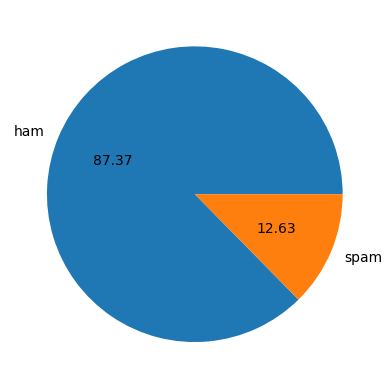

In [ ]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

**Obsrevations:**

1. Data is Imblanced

2. Having Less Spam Messages in Dataset

**🔧 Feature Engineering 🔧**

** ➕ Feature Construction: New Features ➕  **

In [ ]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [ ]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [ ]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(1)

,output,input,characters,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [ ]:
# Statistical Analysis of new features
df[["characters","word"]].describe()

,characters,word
count,5169.000000,5169.000000
mean,78.977945,18.455794
std,58.236293,13.324758
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,26.000000
max,910.000000,220.000000


In [ ]:
# Statistical Analysis for HAM Data

df[df["output"]==0][["characters","word"]].describe()

,characters,word
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [ ]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word"]].describe()

,characters,word
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


**📊 Histogram Plot 📊**

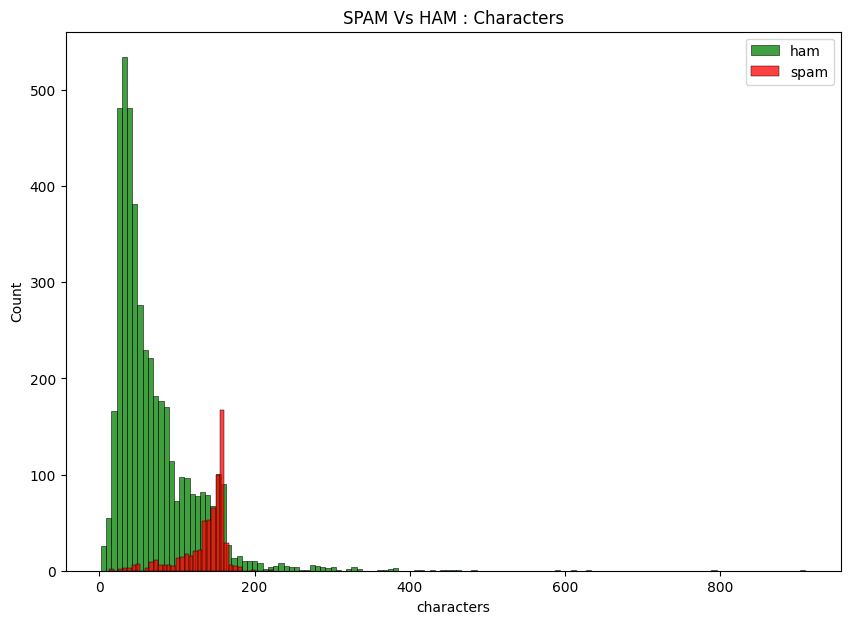

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

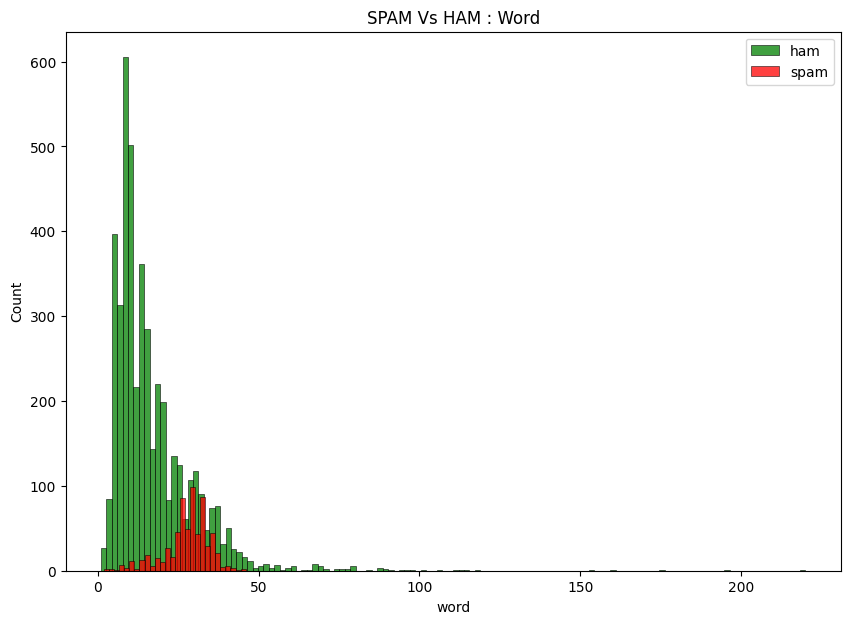

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

**Observations:**

*   Ham Characters and Words are more than Spam


**🌌 Pair Plot 🌌**

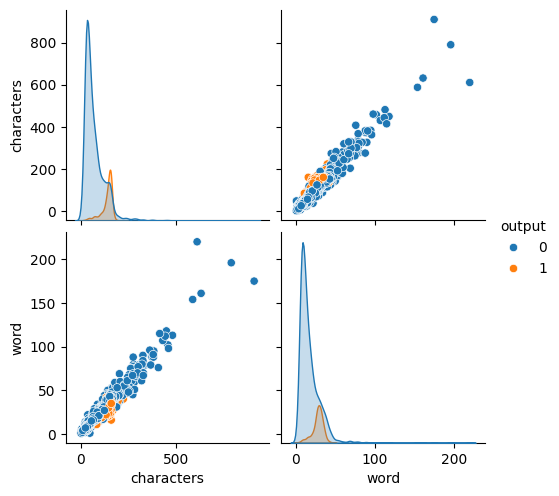

In [ ]:
sns.pairplot(df,hue="output")

**Observations:**

*   Outliers are present

**🌡️ Heatmap 🌡️**

In [ ]:
# Correlations between features

df.corr()

,output,characters,word
output,1.000000,0.384717,0.262912
characters,0.384717,1.000000,0.965760
word,0.262912,0.965760,1.000000


<Axes: >

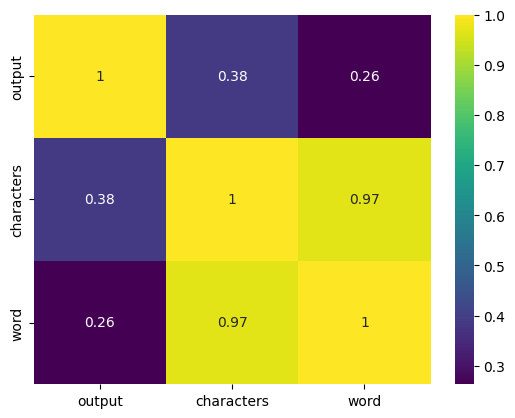

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

**Observations:**

*   "Characters" and "Word" have a moderately strong positive correlation of 0.965760

In [ ]:
# Intilizing Porter Stemmer Class

ps = PorterStemmer()

In [ ]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words

    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
# Checking data function

data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [ ]:
df.sample(2)

,output,input,characters,word
5289,0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,50,15
5081,0,\HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...,119,17


In [ ]:
# Transforming dataset using the "data" function in new column "new_data"

df["new_data"] = df["input"].apply(data)

In [ ]:
df.sample(5)

,output,input,characters,word
3188,0,X2 &lt;#&gt; . Are you going to get that,41,15
2268,1,88066 FROM 88066 LOST 3POUND HELP,33,6
5311,0,K.k:)i'm going to tirunelvali this week to see...,146,34
2578,0,Erm. I thought the contract ran out the4th of ...,54,12
959,0,Where @,7,2


**🌫️ Word Cloud ☁️**

In [ ]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400 )

In [ ]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))

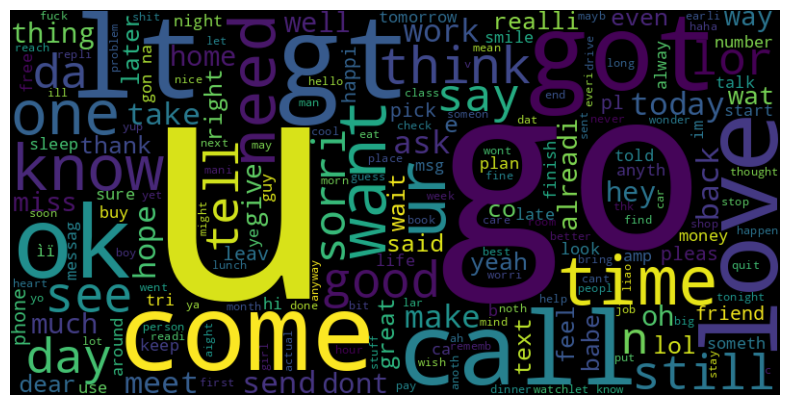

In [ ]:
# SPAM
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

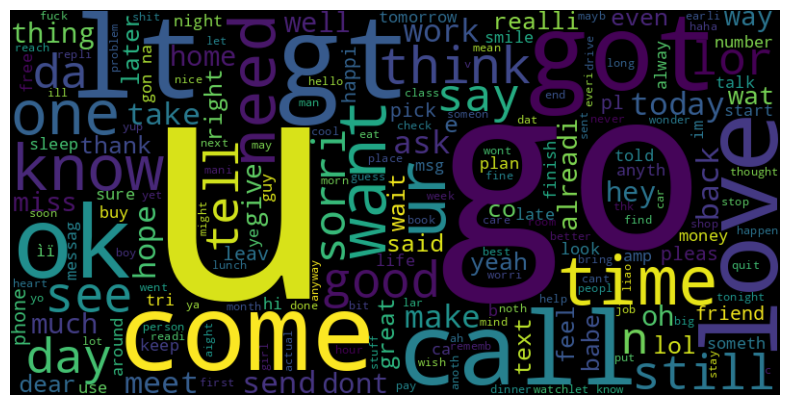

In [ ]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

**📊 Bar Plot 📊**

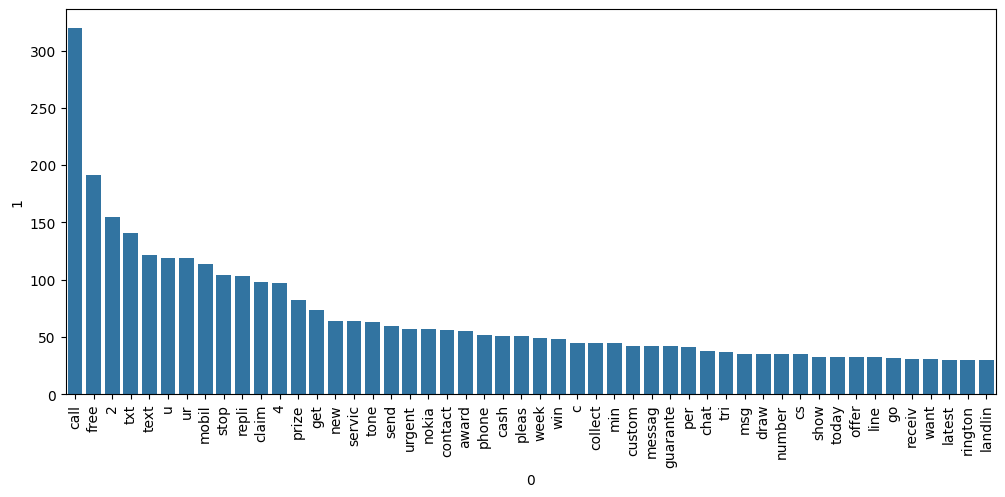

In [ ]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b,)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Spliting HAM Sentences in Words

ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

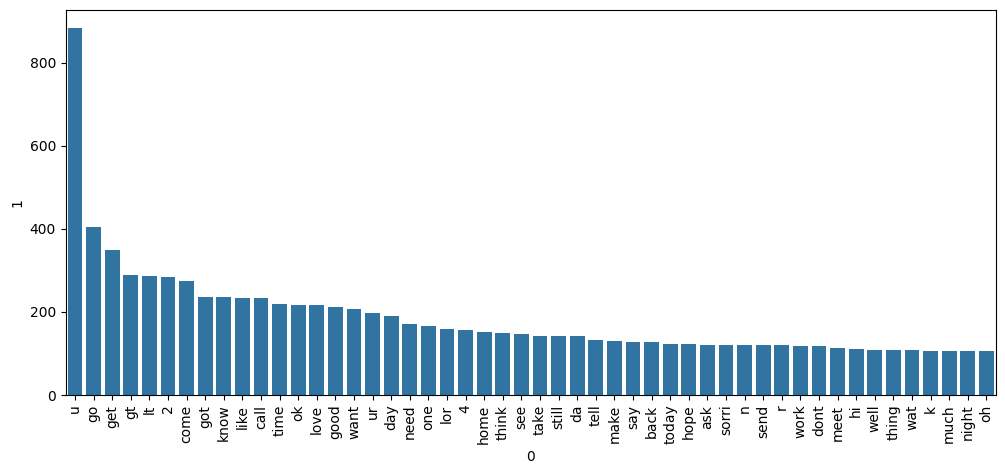

In [ ]:
# Top 50 HAM Words

a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

**🔤 Vectorization 🔤**

In [ ]:
# Initilizing TFIDF Vectorizer

tfidv = TfidfVectorizer(max_features=3000)

In [ ]:
# Independent Feature

X = tfidv.fit_transform(df["new_data"]).toarray()

In [ ]:
# Dependent Feature

y = df["output"].values

In [ ]:
# Performing Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**🎓 Models Training 🤖**

In [ ]:
# Models that are going to be trained

models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier() }

In [ ]:
# Creating a function train each model and calculate/return accuracy and precision

def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)

    return acc, pre

In [ ]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision

acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)

    acc_s.append(accuracy)
    pre_s.append(precision)

In [ ]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(),
                          "Accuracy": acc_s,
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

**📈 Algorithms: Accuracy and Precision 🎯**

In [ ]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
4,SVC,0.972921,0.982456
8,Random Forest,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.976789,0.975000
12,XGB,0.971954,0.943089
10,Ada Boost,0.961315,0.937500
11,Gradient Boost,0.955513,0.933962


**Observations:**

*   Multinomial NB has an accuracy of 97.29% and a precision of 100.00%.
*   KNN (K-Nearest Neighbors) has an accuracy of 90.52% and a precision of 100.00%.
*   Bernoulli NB has an accuracy of 98.16% and a precision of 99.17%.
*   ETC (Extra Trees Classifier) has an accuracy of 97.97% and a precision of 98.35%.
*   Random Forest has an accuracy of 97.49% and a precision of 98.28%.
*   SVC (Support Vector Classifier) has an accuracy of 97.10% and a precision of 97.37%.
*   Logistic Regression has an accuracy of 95.16% and a precision of 96.81%.
*   Gradient Boost has an accuracy of 95.74% and a precision of 94.34%.
*   XGB (Extreme Gradient Boosting) has an accuracy of 97.10% and a precision of 94.26%.
*   Ada Boost has an accuracy of 96.42% and a precision of 93.16%.
*   Bagging CLF (Classifier) has an accuracy of 95.36% and a precision of 87.50%.
*   XGBRF (XGBoost Random Forest) has an accuracy of 94.00% and a precision of 87.25%.
*   Decision Tree has an accuracy of 94.39% and a precision of 80.77%.
*   Gaussian NB (Naive Bayes) has an accuracy of 86.75% and a precision of 50.22%.


**📊 Scores Bar Plot 📊**

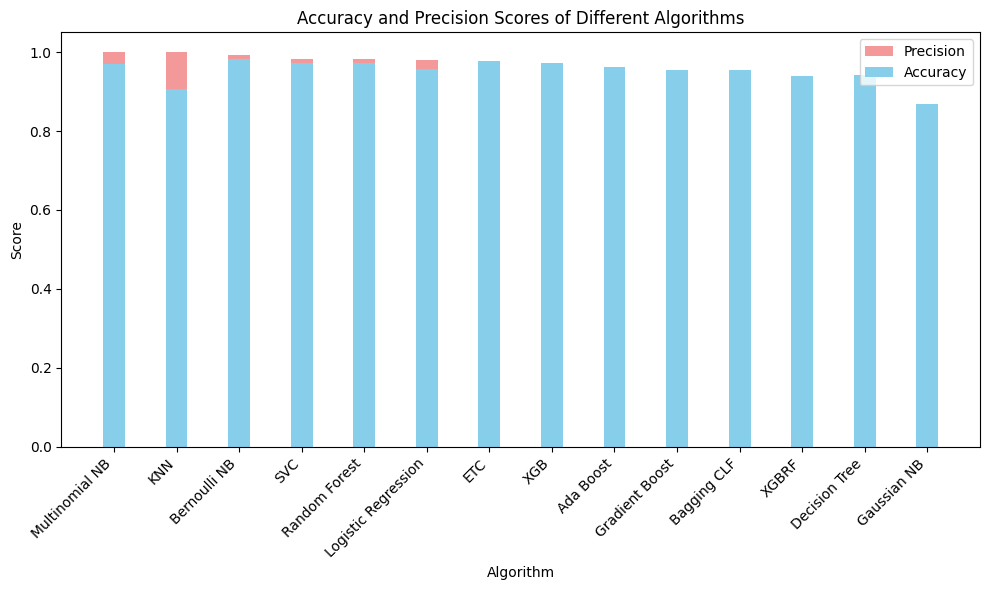

In [ ]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

**Observations:**

*   Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
*   Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.



**📌 Pickle Files 📌**

In [ ]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb"))